In [7]:
import pandas as pd

Vorbereitung und Datensätze laden

In [8]:
df_study = pd.read_csv("study_cohort.csv")
df_validation = pd.read_csv("validation_cohort.csv")

In [9]:
df_study

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1
...,...,...,...,...
19046,33,1,1,1
19047,58,0,1,1
19048,44,0,2,1
19049,61,0,3,0


In [10]:
df_study.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,19051.000000,19051.000000,19051.000000,19051.000000
mean,72.503228,0.448585,1.396252,0.810719
std,18.614470,0.497363,0.783749,0.391742
min,0.000000,0.000000,1.000000,0.000000
25%,65.000000,0.000000,1.000000,1.000000
50%,77.000000,0.000000,1.000000,1.000000
75%,85.000000,1.000000,2.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [11]:
df_study.shape

(19051, 4)

In [12]:
df_validation

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,20,0,1,1
1,22,0,1,1
2,26,1,2,0
3,33,1,1,1
4,33,0,1,1
...,...,...,...,...
132,47,0,1,1
133,50,0,1,0
134,62,0,1,1
135,58,0,1,0


In [13]:
df_validation.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,137.000000,137.000000,137.000000,137.000000
mean,59.540146,0.343066,1.160584,0.824818
std,15.748956,0.476475,0.368494,0.381518
min,20.000000,0.000000,1.000000,0.000000
25%,50.000000,0.000000,1.000000,1.000000
50%,60.000000,0.000000,1.000000,1.000000
75%,72.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,2.000000,1.000000


In [14]:
df_validation.shape

(137, 4)

Daten von study_cohort bereinigen und Vorbereiten

In [15]:
import numpy as np

In [16]:
# Spalten angeben von study_cohort
df_study_clean = df_study[['age_years', 'sex_0male_1female', 'episode_number', 'hospital_outcome_1alive_0dead']].copy()

In [17]:
#Spaltenlesbarkeit anpassen von study_cohort
df_study_clean.rename(columns={
    'age_years': 'age',
    'sex_0male_1female': 'sex',
    'episode_number': 'sepsis_episodes',
    'hospital_outcome_1alive_0dead': 'outcome'
}, inplace=True)

In [18]:
# auf fehlende Werte prüfen
missing_values = df_study_clean.isnull().sum()
print(missing_values)


age                0
sex                0
sepsis_episodes    0
outcome            0
dtype: int64


In [19]:
# Datentypen prüfen
print(df_study_clean.dtypes)

age                int64
sex                int64
sepsis_episodes    int64
outcome            int64
dtype: object


In [20]:
# Geschlecht als Text "male", "female" darstellen, Spalte hinzufügen

df_study_clean['sex_label'] = df_study_clean['sex'].map({0: 'male', 1: 'female'})


In [21]:
# Outcome als Text "dead", "alive"
df_study_clean['outcome_label'] = df_study_clean['outcome'].map({0: 'dead', 1: 'alive'})

In [22]:
print(df_study_clean)

       age  sex  sepsis_episodes  outcome sex_label outcome_label
0        7    1                1        1    female         alive
1       17    0                2        1      male         alive
2       70    0                1        1      male         alive
3       76    0                1        1      male         alive
4        8    0                1        1      male         alive
...    ...  ...              ...      ...       ...           ...
19046   33    1                1        1    female         alive
19047   58    0                1        1      male         alive
19048   44    0                2        1      male         alive
19049   61    0                3        0      male          dead
19050   78    0                1        1      male         alive

[19051 rows x 6 columns]


Datenanalyse

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Definieren der Altersgruppen
df_study_clean['age_group'] = pd.cut(
    df_study_clean['age'],
    bins=[0, 40, 60, 80, 120],
    labels=['<40', '40-60', '60-80', '80+']
)

In [25]:
# Gruppenweises Berechnen der Mortalitätsrate
grouped = df_study_clean.groupby(
    ['age_group', 'sex_label', 'sepsis_episodes']
)['outcome'].agg(['count', 'mean']).reset_index()

grouped.rename(columns={'mean': 'survival_rate'}, inplace=True)
grouped['mortality_rate'] = 1 - grouped['survival_rate']

/var/folders/61/55czhp8x40s9sz98hbyd8c440000gn/T/ipykernel_54828/4025144532.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_study_clean.groupby(


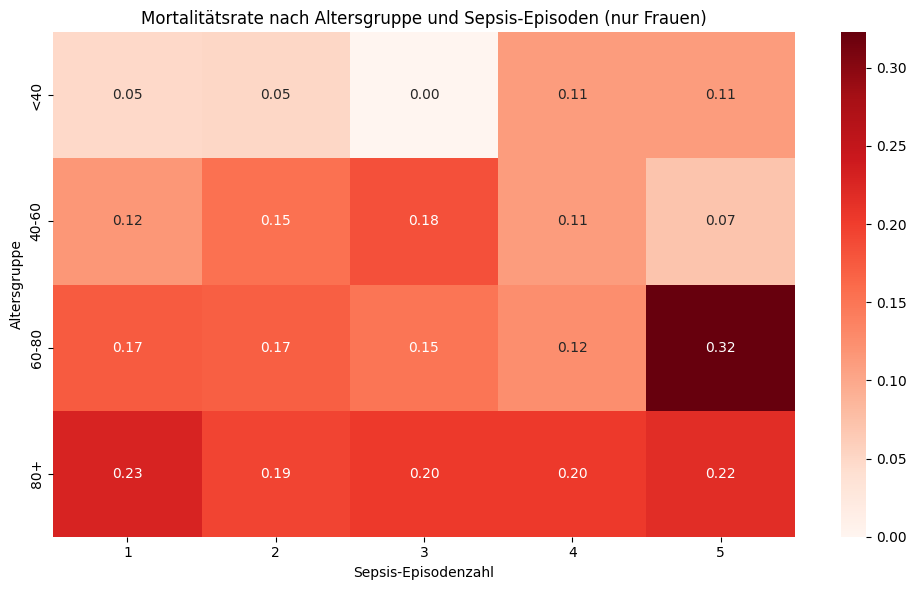

In [26]:
# Heatmap für Frauen
heatmap_data = grouped[
    grouped['sex_label'] == 'female'
].pivot(index='age_group', columns='sepsis_episodes', values='mortality_rate')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f")
plt.title('Mortalitätsrate nach Altersgruppe und Sepsis-Episoden (nur Frauen)')
plt.xlabel('Sepsis-Episodenzahl')
plt.ylabel('Altersgruppe')
plt.tight_layout()
plt.show()

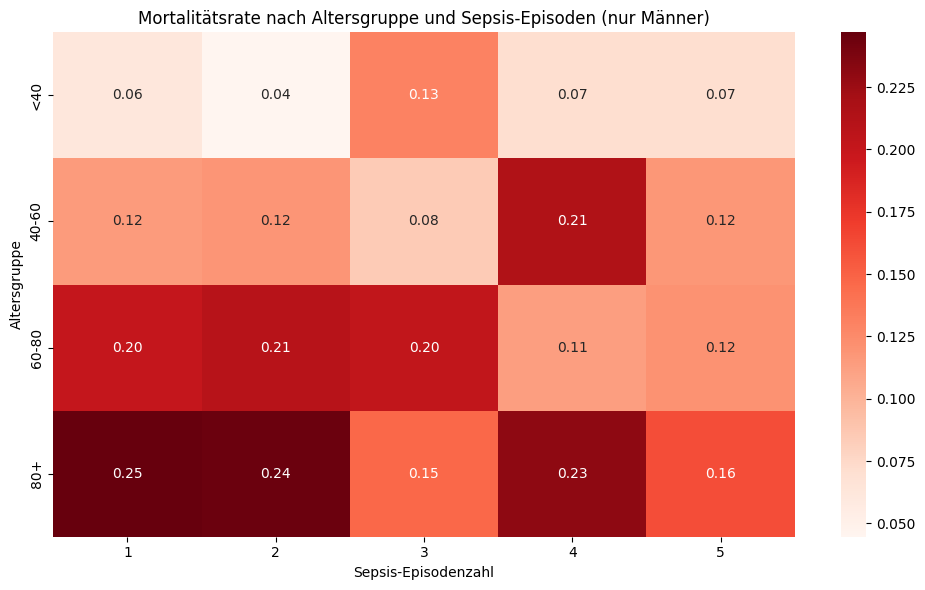

In [27]:
# Heatmap für Männer
heatmap_data = grouped[
    grouped['sex_label'] == 'male'
].pivot(index='age_group', columns='sepsis_episodes', values='mortality_rate')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f")
plt.title('Mortalitätsrate nach Altersgruppe und Sepsis-Episoden (nur Männer)')
plt.xlabel('Sepsis-Episodenzahl')
plt.ylabel('Altersgruppe')
plt.tight_layout()
plt.show()

In [28]:
# Vergleichen der Mortalitätsraten 
mortality_by_sex = df_study_clean.groupby('sex_label')['outcome'].agg(['count', 'mean']).copy()
mortality_by_sex['mortality_rate'] = 1 - mortality_by_sex['mean']

print("Mortalitätsrate nach Geschlecht:")
print(mortality_by_sex)

Mortalitätsrate nach Geschlecht:
           count      mean  mortality_rate
sex_label                                 
female      8546  0.817341        0.182659
male       10505  0.805331        0.194669


Detaillierter Vergleich zwischen Männern und Frauen

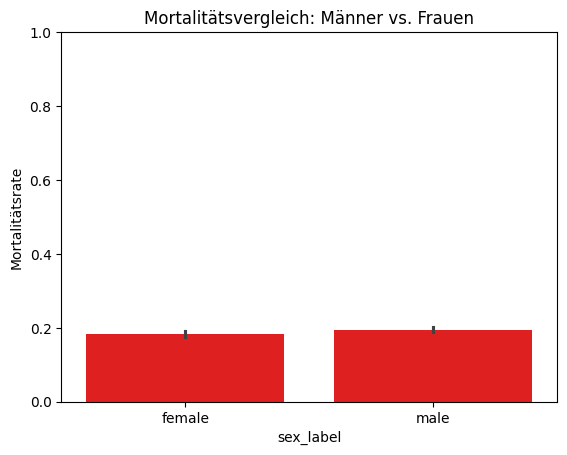

In [29]:
# Ein Balkendiagramm zur Visualisierung der Moratalitätsrate nach Geschlecht
sns.barplot(
    x='sex_label',
    y='outcome',
    data=df_study_clean,
    estimator=lambda x: 1 - x.mean(),  # Mortalitätsrate
    color ='red'
)

plt.ylabel('Mortalitätsrate')
plt.title('Mortalitätsvergleich: Männer vs. Frauen')
plt.ylim(0, 1)
plt.show()

In [30]:
from scipy.stats import chi2_contingency

In [31]:
#Zusammenhang zwischen Geschlecht und Outcome -> Chi Quadrat Test (beobachtete Häufigkeiten vergleichen),
#Kontingenztabelle erstellen (Geschlecht vs. Outcome),
contingency = pd.crosstab(df_study_clean['sex_label'], df_study_clean['outcome_label'])

#Chi²-Test durchführen,
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi²-Statistik:", chi2)
print("p-Wert:", p)

Chi²-Statistik: 4.352000320784457
p-Wert: 0.03696550441728398


p <= 0.05
Chi-Test hat ergeben, dass Geschlecht und Überleben statistisch zusammenhängen -> Männer und Frauen unterscheiden sich signifikant in ihrer Überlebenswahrscheinlichkeit bei Sepsis

-> logistische Regression, um Effekte zu ermitteln

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [33]:
# Zielvariable definieren
X = df_study_clean[['age', 'sex', 'sepsis_episodes']]
y = df_study_clean['outcome']  


In [34]:
#Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [35]:
#Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#Modell trainieren
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
#Modell bewerten
y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Testgenauigkeit: {accuracy:.3f}")
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

Testgenauigkeit: 0.822
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       850
           1       0.82      1.00      0.90      3913

    accuracy                           0.82      4763
   macro avg       0.41      0.50      0.45      4763
weighted avg       0.67      0.82      0.74      4763



/Users/lilithhanisch/Desktop/Master/Semester 2/M12 - Application of Machine Learning in Health Care/Final Exam/AMLHC-final-exam_Haenisch_Wild/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lilithhanisch/Desktop/Master/Semester 2/M12 - Application of Machine Learning in Health Care/Final Exam/AMLHC-final-exam_Haenisch_Wild/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lilithhanisch/Desktop/Master/Semester 2/M12 - Application of Machine Learning in Heal

In [38]:
#Einfluss der Variablen
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Koeffizient': logreg.coef_[0]
})
print("\nEinfluss der Variablen (logistische Regressionskoeffizienten):")
print(coef_df)


Einfluss der Variablen (logistische Regressionskoeffizienten):
           Feature  Koeffizient
0              age    -0.410357
1              sex     0.070131
2  sepsis_episodes     0.031449


Ergebnisinterpretation logistische Regression:
-> age: negativer Koeffizient: Je älter, desto geringer Überlebenswahrscheinlichkeit 
-> sex: positiv: weiblich (1) leicht bessere Überlebenschancen
-> Leichter positiver Effekt auf Überleben.. wirkt unrealistisch. Mögliche Erklärung: Patienten mit mehreren Episoden könnten früher oder wiederholt erkannt worden sein, Überlebende landen häufiger erneut in der Statistik

Odds Ratio: Ergebnisse intuitiver zu interpretieren als mit Roh-Koeffizienten

In [39]:
import numpy as np

In [41]:
#Odds Ratios berechnen
odds_ratios = np.exp(logreg.coef_[0])

or_df = pd.DataFrame({
    'Feature': X.columns,
    'Odds Ratio': odds_ratios
})

print(or_df)


           Feature  Odds Ratio
0              age    0.663413
1              sex    1.072649
2  sepsis_episodes    1.031948


Ergebnis:
age -> Je älter eine Person, desto geringer die Chance zu überleben
sex -> Frauen haben 7 % höhere Überlebenschancen als Männer
sepsis_episodes -> Jede zusätzliche Sepsis-Episode ist mit 3 % höherer Überlebenswahrscheinlichkeit verbunden, unrealistisch daten eventeull verzerrt, mögliche Erklärung: Patienten mit mehreren Episoden könnten früher oder wiederholt erkannt worden sein, Überlebende landen häufiger erneut in der Statistik

Sepsis Episoden alalysieren -> Mortalitätsrate je Episodenzahl

In [42]:
mortality_by_episodes = df_study_clean.groupby('sepsis_episodes')['outcome'].agg(['count', 'mean']).reset_index()
mortality_by_episodes['mortality_rate'] = 1 - mortality_by_episodes['mean']

print(mortality_by_episodes[['sepsis_episodes', 'count', 'mortality_rate']])

   sepsis_episodes  count  mortality_rate
0                1  14042        0.192992
1                2   3304        0.188559
2                3   1067        0.163074
3                4    441        0.151927
4                5    197        0.162437


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

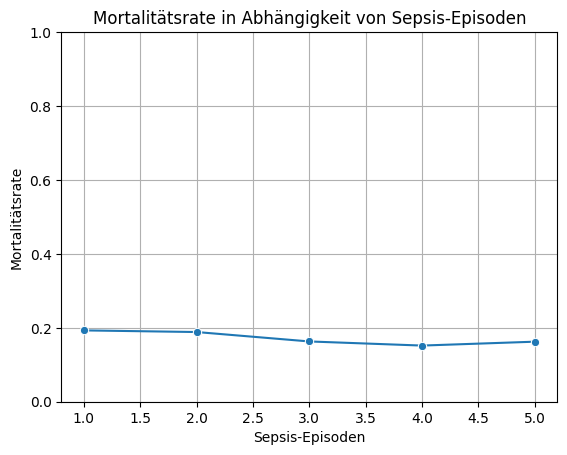

In [44]:
#Visualisierung
sns.lineplot(data=mortality_by_episodes, x='sepsis_episodes', y='mortality_rate', marker='o')
plt.title('Mortalitätsrate in Abhängigkeit von Sepsis-Episoden')
plt.xlabel('Sepsis-Episoden')
plt.ylabel('Mortalitätsrate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Fazit: nur Überlebende können überhaupt mehrere Episoden haben -> Survivorship Bias